In [1]:
# Christine Orosco
# Store dataset to a local SQLite DD and conduct EDA

In [2]:
# import libraries
import pandas as pd
import numpy as np
import sqlite3
import json
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set context to `"paper"`
sns.set(rc={"font.size":15,"axes.labelsize":10})
#fig, ax = plt.subplots(figsize=(10,10))
sns.set(color_codes=True)

## Read the flat file

In [4]:
# Read csv file into df
clean_csv_df = pd.read_csv('~/cancer_csv.csv')
clean_csv_df.head(5)

,Year,State,State_Code,HHS_Region,Age_Range,Benchmark,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths
0,2010,Alabama,AL,4,0-84,2010 Fixed,All,8879.0,4704052.0,6279.0,2600.0,29.3
1,2010,Alaska,AK,10,0-84,2010 Fixed,All,798.0,705520.0,664.0,134.0,16.8
2,2010,Arizona,AZ,9,0-84,2010 Fixed,All,8917.0,6288617.0,8177.0,740.0,8.3
3,2010,Arkansas,AR,6,0-84,2010 Fixed,All,5547.0,2864516.0,3893.0,1654.0,29.8
4,2010,California,CA,9,0-84,2010 Fixed,All,46065.0,36652988.0,41572.0,4493.0,9.8


## Connect to SQLite DB

In [5]:
# Connect to DB and load table from pandas into sqlite
# Csv file
conn = sqlite3.connect('~/cancer_data.db')
c1 = conn.cursor()

In [6]:
clean_csv_df.to_sql("clean_csv", conn, if_exists="replace")

In [7]:
# Query table for data
results = c1.execute('Select * from clean_csv limit 10')
for row in results:
    print(row)

(0, 2010, 'Alabama', 'AL', 4, '0-84', '2010 Fixed', 'All', 8879.0, 4704052.0, 6279.0, 2600.0, 29.3)
(1, 2010, 'Alaska', 'AK', 10, '0-84', '2010 Fixed', 'All', 798.0, 705520.0, 664.0, 134.0, 16.8)
(2, 2010, 'Arizona', 'AZ', 9, '0-84', '2010 Fixed', 'All', 8917.0, 6288617.0, 8177.0, 740.0, 8.3)
(3, 2010, 'Arkansas', 'AR', 6, '0-84', '2010 Fixed', 'All', 5547.0, 2864516.0, 3893.0, 1654.0, 29.8)
(4, 2010, 'California', 'CA', 9, '0-84', '2010 Fixed', 'All', 46065.0, 36652988.0, 41572.0, 4493.0, 9.8)
(5, 2010, 'Colorado', 'CO', 8, '0-84', '2010 Fixed', 'All', 5879.0, 4959583.0, 5623.0, 263.0, 4.5)
(6, 2010, 'Connecticut', 'CT', 1, '0-84', '2010 Fixed', 'All', 5454.0, 3489199.0, 4723.0, 731.0, 13.4)
(7, 2010, 'Delaware', 'DE', 3, '0-84', '2010 Fixed', 'All', 1631.0, 882190.0, 1212.0, 419.0, 25.7)
(8, 2010, 'District of\nColumbia', 'DC', 3, '0-84', '2010 Fixed', 'All', 855.0, 591408.0, 657.0, 199.0, 23.3)
(9, 2010, 'Florida', 'FL', 4, '0-84', '2010 Fixed', 'All', 34229.0, 18367185.0, 28894.0, 

In [8]:
# Load Website data file into pandas
clean_html_df = pd.read_csv('~/website_deaths.csv')
clean_html_df.head(5)

,State,Avg_Ann_Count,Recent_Trend,AA_Death_Rate_100K(95%CI),AA_CI_lower,AA_CI_upper,Recent_5yr_Death_Rate(95%CI),5yr_Death_Rate_CI_lower,5yr_Death_Rate_CI_upper
0,Kentucky,3307,falling,60.4,59.5,61.3,-5.6,-7.7,-3.4
1,West Virginia,1416,falling,53.6,52.3,54.8,-1.9,-2.2,-1.5
2,Arkansas,2002,falling,52.8,51.8,53.9,-3.1,-3.9,-2.3
3,Mississippi,1880,falling,52.8,51.7,53.9,-2.6,-3.0,-2.1
4,Tennessee,4212,falling,51.3,50.6,52.0,-5.4,-7.3,-3.5


In [9]:
# Connect to DB and load table from pandas into sqlite
# website file
c1 = conn.cursor()
clean_html_df.to_sql('clean_html', conn, if_exists='replace')
conn.commit()

In [10]:
# Query table for data
results = c1.execute('Select * from clean_html limit 10')
for row in results:
    print(row)

(0, 'Kentucky', 3307, 'falling', 60.4, 59.5, 61.3, -5.6, -7.7, -3.4)
(1, 'West Virginia', 1416, 'falling', 53.6, 52.3, 54.8, -1.9, -2.2, -1.5)
(2, 'Arkansas', 2002, 'falling', 52.8, 51.8, 53.9, -3.1, -3.9, -2.3)
(3, 'Mississippi', 1880, 'falling', 52.8, 51.7, 53.9, -2.6, -3.0, -2.1)
(4, 'Tennessee', 4212, 'falling', 51.3, 50.6, 52.0, -5.4, -7.3, -3.5)
(5, 'Oklahoma', 2323, 'falling', 50.0, 49.1, 50.9, -2.5, -3.1, -2.0)
(6, 'Indiana', 3843, 'falling', 48.7, 48.0, 49.5, -4.5, -6.3, -2.6)
(7, 'Missouri', 3762, 'falling', 48.7, 48.0, 49.4, -4.6, -6.0, -3.2)
(8, 'Alabama', 2998, 'falling', 48.5, 47.8, 49.3, -3.3, -3.9, -2.7)
(9, 'Louisiana', 2569, 'falling', 47.5, 46.7, 48.4, -4.7, -6.6, -2.7)


In [11]:
# # Load API data file into pandas
clean_api_df = pd.read_csv('~/api_deaths.csv')
conn.commit()
clean_api_df.head(5)

,State_Code,yearstart,yearend,Strat,Value_Type,Value
0,AK,2010,2014,Overall,AA_Nbr,255.0
1,AL,2010,2014,Overall,AA_Nbr,3149.0
2,AR,2010,2014,Overall,AA_Nbr,2118.0
3,AZ,2010,2014,Overall,AA_Nbr,2736.0
4,CA,2010,2014,Overall,AA_Nbr,12590.0


In [12]:
# Connect to DB and load table from pandas into sqlite
# website file
c1 = conn.cursor()
clean_api_df.to_sql('clean_api', conn, if_exists='replace')
conn.commit()

In [13]:
# Query table for data
results = c1.execute('Select * from clean_api limit 10')
for row in results:
    print(row)

(0, 'AK', 2010, 2014, 'Overall', 'AA_Nbr', 255.0)
(1, 'AL', 2010, 2014, 'Overall', 'AA_Nbr', 3149.0)
(2, 'AR', 2010, 2014, 'Overall', 'AA_Nbr', 2118.0)
(3, 'AZ', 2010, 2014, 'Overall', 'AA_Nbr', 2736.0)
(4, 'CA', 2010, 2014, 'Overall', 'AA_Nbr', 12590.0)
(5, 'CO', 2010, 2014, 'Overall', 'AA_Nbr', 1591.0)
(6, 'CT', 2010, 2014, 'Overall', 'AA_Nbr', 1712.0)
(7, 'DC', 2010, 2014, 'Overall', 'AA_Nbr', 241.0)
(8, 'DE', 2010, 2014, 'Overall', 'AA_Nbr', 568.0)
(9, 'FL', 2010, 2014, 'Overall', 'AA_Nbr', 11896.0)


## Merge 3 tables into 1

In [14]:
# Merge the 3 tables into 1 large table within Sqlite using SQL JOIN
c1.execute('create table big_tab as \
select a.*, b.* , c.* from clean_api a \
inner join clean_csv b on b.State_Code = a.State_Code \
inner join clean_html c on c.State = b.State')

In [15]:
conn.commit()

In [44]:
# select the data from the table that contains all three tables joined together
results = c1.execute('select * from big_tab limit 10')
for row in results:
    print(row)

(0, 'AK', 2010, 2014, 'Overall', 'AA_Nbr', 255.0, 1, 2010, 'Alaska', 'AK', 10, '0-84', '2010 Fixed', 'All', 798.0, 705520.0, 664.0, 134.0, 16.8, 33, 'Alaska', 228, 'falling', 36.6, 34.3, 38.9, -7.5, -10.3, -4.6)
(0, 'AK', 2010, 2014, 'Overall', 'AA_Nbr', 255.0, 53, 2011, 'Alaska', 'AK', 10, '0-84', '2010 Fixed', 'All', 836.0, 717624.0, 692.0, 145.0, 17.3, 33, 'Alaska', 228, 'falling', 36.6, 34.3, 38.9, -7.5, -10.3, -4.6)
(0, 'AK', 2010, 2014, 'Overall', 'AA_Nbr', 255.0, 103, 2012, 'Alaska', 'AK', 10, '0-84', '2010 Fixed', 'All', 830.0, 726076.0, 719.0, 111.0, 13.4, 33, 'Alaska', 228, 'falling', 36.6, 34.3, 38.9, -7.5, -10.3, -4.6)
(0, 'AK', 2010, 2014, 'Overall', 'AA_Nbr', 255.0, 154, 2013, 'Alaska', 'AK', 10, '0-84', '2010 Fixed', 'All', 913.0, 729443.0, 734.0, 179.0, 19.6, 33, 'Alaska', 228, 'falling', 36.6, 34.3, 38.9, -7.5, -10.3, -4.6)
(0, 'AK', 2010, 2014, 'Overall', 'AA_Nbr', 255.0, 205, 2014, 'Alaska', 'AK', 10, '0-84', '2010 Fixed', 'All', 882.0, 730801.0, 749.0, 138.0, 15.6, 

In [17]:
# Combine the data from the tables by importing each table into a DF then combine all DFs into 1 large DF using pandas
# PD.JOIN

In [18]:
# Read the three tables from sqlite into seperate DFs
clean_csv_df = pd.read_sql_query("SELECT * from clean_csv", conn, index_col=['State_Code', 'State'])
clean_csv_df.head(5)

,,index,Year,HHS_Region,Age_Range,Benchmark,Locality,Observed_Deaths,Population,Expected_Deaths,Potentially_Excess_Deaths,Percent_Potentially_Excess_Deaths
State_Code,State,,,,,,,,,,,
AL,Alabama,0,2010,4,0-84,2010 Fixed,All,8879.0,4704052.0,6279.0,2600.0,29.3
AK,Alaska,1,2010,10,0-84,2010 Fixed,All,798.0,705520.0,664.0,134.0,16.8
AZ,Arizona,2,2010,9,0-84,2010 Fixed,All,8917.0,6288617.0,8177.0,740.0,8.3
AR,Arkansas,3,2010,6,0-84,2010 Fixed,All,5547.0,2864516.0,3893.0,1654.0,29.8
CA,California,4,2010,9,0-84,2010 Fixed,All,46065.0,36652988.0,41572.0,4493.0,9.8


In [19]:
clean_html_df = pd.read_sql_query("SELECT * from clean_html", conn, index_col='State')
clean_html_df.head(5)

,index,Avg_Ann_Count,Recent_Trend,AA_Death_Rate_100K(95%CI),AA_CI_lower,AA_CI_upper,Recent_5yr_Death_Rate(95%CI),5yr_Death_Rate_CI_lower,5yr_Death_Rate_CI_upper
State,,,,,,,,,
Kentucky,0,3307,falling,60.4,59.5,61.3,-5.6,-7.7,-3.4
West Virginia,1,1416,falling,53.6,52.3,54.8,-1.9,-2.2,-1.5
Arkansas,2,2002,falling,52.8,51.8,53.9,-3.1,-3.9,-2.3
Mississippi,3,1880,falling,52.8,51.7,53.9,-2.6,-3.0,-2.1
Tennessee,4,4212,falling,51.3,50.6,52.0,-5.4,-7.3,-3.5


In [20]:
clean_api_df = pd.read_sql_query("SELECT * from clean_api", conn, index_col='State_Code')

In [21]:
clean_api_df.head(5)

,index,yearstart,yearend,Strat,Value_Type,Value
State_Code,,,,,,
AK,0,2010,2014,Overall,AA_Nbr,255.0
AL,1,2010,2014,Overall,AA_Nbr,3149.0
AR,2,2010,2014,Overall,AA_Nbr,2118.0
AZ,3,2010,2014,Overall,AA_Nbr,2736.0
CA,4,2010,2014,Overall,AA_Nbr,12590.0


## Combine 3 Dataframes into 1

In [22]:
# Combine all three DFs into 1 DF using PD.JOIN

big_df1 = clean_csv_df.join(clean_api_df, on='State_Code', lsuffix="State_Code_x", rsuffix="State_Code_y")\
    .join(clean_html_df, on='State', lsuffix="State_x", rsuffix="State_y" )
big_df1.columns

Index(['indexState_Code_x', 'Year', 'HHS_Region', 'Age_Range', 'Benchmark',
       'Locality', 'Observed_Deaths', 'Population', 'Expected_Deaths',
       'Potentially_Excess_Deaths', 'Percent_Potentially_Excess_Deaths',
       'indexState_Code_y', 'yearstart', 'yearend', 'Strat', 'Value_Type',
       'Value', 'index', 'Avg_Ann_Count', 'Recent_Trend',
       'AA_Death_Rate_100K(95%CI)', 'AA_CI_lower', 'AA_CI_upper',
       'Recent_5yr_Death_Rate(95%CI)', '5yr_Death_Rate_CI_lower',
       '5yr_Death_Rate_CI_upper'],
      dtype='object')

In [23]:
# drop columns 
big_df1.drop(columns = ['indexState_Code_x', 'HHS_Region', 'index', 'indexState_Code_y', 'Locality'], axis=1, inplace=True)

In [24]:
big_df1.dtypes

Year                                   int64
Age_Range                             object
Benchmark                             object
Observed_Deaths                      float64
Population                           float64
Expected_Deaths                      float64
Potentially_Excess_Deaths            float64
Percent_Potentially_Excess_Deaths    float64
yearstart                              int64
yearend                                int64
Strat                                 object
Value_Type                            object
Value                                float64
Avg_Ann_Count                        float64
Recent_Trend                          object
AA_Death_Rate_100K(95%CI)            float64
AA_CI_lower                          float64
AA_CI_upper                          float64
Recent_5yr_Death_Rate(95%CI)         float64
5yr_Death_Rate_CI_lower              float64
5yr_Death_Rate_CI_upper              float64
dtype: object

In [25]:
# Reset the index to State_Code and Year
big_df1.reset_index(inplace=True)

## Create Visualization Functions

In [27]:
# Create Histogram Plot Function
def Hist_Plot(subtitle, xlab, ser1, xval):
    """Plot histogram"""
     
    # Main Title    
    fig = plt.figure(figsize=(15,10))
    title = fig.suptitle(subtitle, fontsize=14, fontweight="bold")
                         
    fig.subplots_adjust(top=0.88, wspace=0.3)
    
    # Histogram
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    sns.histplot(data=ser1, x=xval, bins=20, color='darksalmon')
    plt.show()
                                       
    return

# Create Scatter Plot function

def sns_Scatter(subtitle, xlab, ylab, xval, yval, data):
    """Scatter plot"""
    fig = plt.figure(figsize=(15,10))
    title = fig.suptitle(subtitle, \
                         fontsize=14, fontweight="bold")
    fig.subplots_adjust(top=0.88, wspace=0.3)
    # Scatter Plots
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    sns.scatterplot(x = xval, y = yval, data=ser1)
    plt.show()
    return

# Create a barplot function    
 
def sns_bar(subtitle, ser1, xlab, ylab,  xval, yval):
    """Plot a bar plot"""

    fig = plt.figure(figsize=(15,10))
    title = fig.suptitle(subtitle, \
                     fontsize=14, fontweight="bold")
    fig.subplots_adjust(top=0.88, wspace=0.3)
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    sns.barplot(data=ser1, x=xval, y=yval, label=xlab, ax=ax1)
    plt.show()
    return 

# Create a line chart function 

def sns_line(subtitle, ser1, xlab, ylab,  xval, yval, t_hue):
    """Plot a line plot"""

    fig = plt.figure(figsize=(15,10))
    title = fig.suptitle(subtitle, \
                     fontsize=14, fontweight="bold")
    fig.subplots_adjust(top=0.88, wspace=0.3)
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)

    sns.lineplot(data=ser1, x = xval, y = yval, hue=t_hue)
    plt.show()
    return

# Create a regression chart function 

def sns_reg(subtitle, ser1, xlab, ylab,  xval, yval):
    """Plot a linear regression"""

    fig = plt.figure(figsize=(15,10))
    title = fig.suptitle(subtitle, \
                     fontsize=14, fontweight="bold")
    fig.subplots_adjust(top=0.88, wspace=0.3)
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)

    sns.regplot(data=ser1, x = xval, y = yval)
    plt.show()
    return


## Create Scatter Plots

In [28]:

# create a DF with only the observed_deaths and Year
ser1 = big_df1[['Observed_Deaths', 'Population']].copy()

In [29]:
# Compute log values for better visualization
ser1['Population_log'] = np.log10(ser1[['Population']])
ser1['Observed_Deaths_log'] = np.log10(ser1[['Observed_Deaths']])

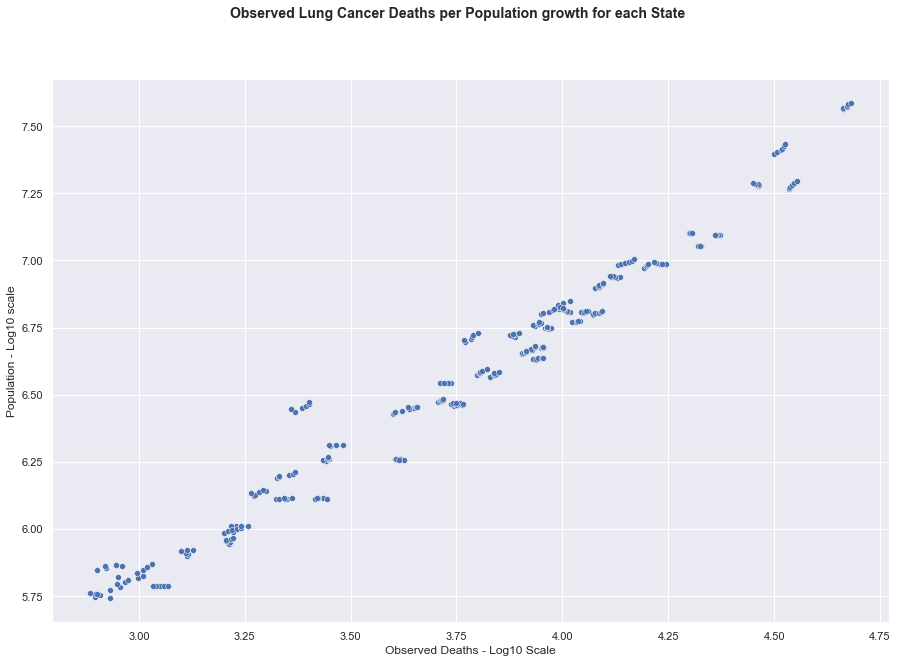

In [30]:
# Create a Scatter plot for Population and observed number of deaths
subtitle = 'Observed Lung Cancer Deaths per Population growth for each State'
xval = 'Observed_Deaths_log'
yval = 'Population_log'
xlab = 'Observed Deaths - Log10 Scale'
ylab = 'Population - Log10 scale'
sns_Scatter(subtitle, xlab, ylab, xval, yval, ser1)

## Create Bar Plots

In [31]:
# Create a bar chart of the Age_adjusted Number per 100K deaths for each state.
# Drop duplicates because values are repeated for each year. Only need one row per state
ser1 = big_df1[['State_Code', 'Value']].sort_values('Value', ascending = False).copy()
ser1.drop_duplicates(keep='first', inplace=True)

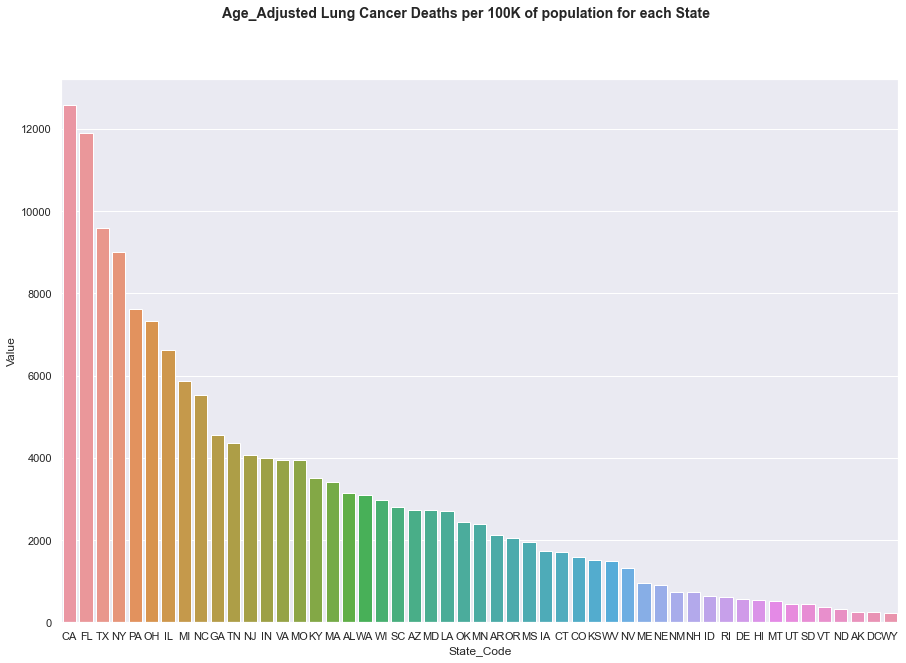

In [45]:
# Define Plot params
ser1 = big_df1[['State_Code', 'Value']].sort_values('Value', ascending = False).copy()
subtitle = "Age_Adjusted Lung Cancer Deaths per 100K of population for each State"
xlab = "State"
xval = 'State_Code'
ylab = 'Age_Adjusted Annual Lung Cancer Number'
yval = 'Value'
sns_bar(subtitle, ser1, xlab, ylab, xval, yval)


## Create Line Charts

In [33]:
# Create a line chart showing the observed_deaths vs expected deaths for 5 years for CA. 

In [34]:
# Reshape the data to show two lines representing Observed Deaths and Expected Deaths
tmp_df = big_df1[['Expected_Deaths', 'Observed_Deaths', 'State_Code', 'Year']].copy()
ser1 = tmp_df[tmp_df['State_Code'] == 'CA'].copy()
ser1.drop(columns='State_Code', inplace=True)
tmp = pd.melt(ser1, id_vars=['Year'], var_name='Type', value_name = 'Nbr_Of_Deaths')
tmp.head(5)

,Year,Type,Nbr_Of_Deaths
0,2010,Expected_Deaths,41572.0
1,2011,Expected_Deaths,42716.0
2,2012,Expected_Deaths,43948.0
3,2013,Expected_Deaths,45240.0
4,2014,Expected_Deaths,46683.0


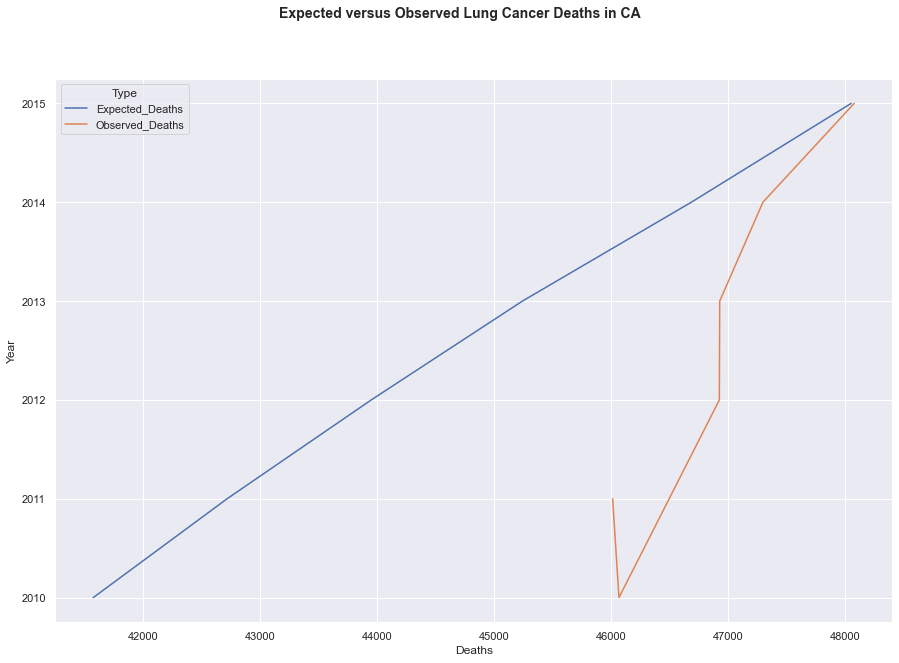

In [46]:
# Create line plot showing the two categories of values
ser1 = tmp
subtitle = "Expected versus Observed Lung Cancer Deaths in CA"
xlab = 'Deaths'
xval = 'Nbr_Of_Deaths'
ylab = 'Year'
yval = 'Year'
t_hue = 'Type'
sns_line(subtitle, ser1, xlab, ylab,  xval, yval, t_hue)


In [36]:
# Show the observed deaths for California because the line graph shows an anomaly
tmp2 = big_df1[['State_Code', 'Year','Observed_Deaths']].copy()
tmp2[(tmp2['State_Code'] == 'CA')]

,State_Code,Year,Observed_Deaths
4,CA,2010,46065.0
51,CA,2011,46011.0
106,CA,2012,46923.0
157,CA,2013,46926.0
208,CA,2014,47295.0
259,CA,2015,48075.0


## Create Histogram

In [37]:
# Create a histogram of the average annaul death rates for all states.

In [48]:
# Select a subset for the histogram. Drop duplicate rows as all the years reflect the same value
ser1 = big_df1[['State_Code', 'Avg_Ann_Count']].copy()
ser1.drop_duplicates(keep='first', inplace=True)

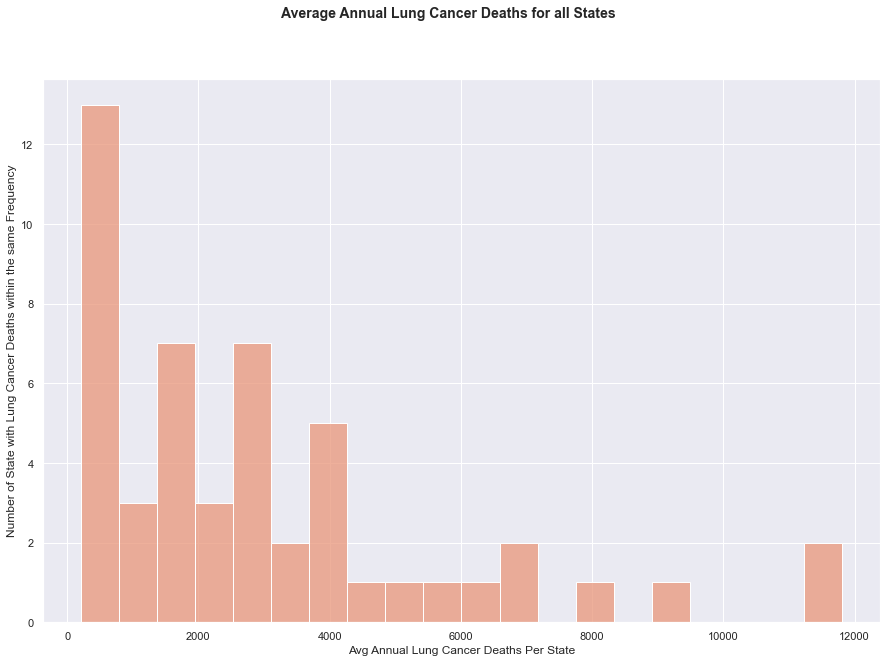

In [50]:
# Define Plot Params
subtitle = "Average Annual Lung Cancer Deaths for all States"
xlab = "Avg Annual Lung Cancer Deaths Per State"
xval = 'Avg_Ann_Count'
ylab = 'Number of State with Lung Cancer Deaths within the same Frequency'
yval = 'Value'
Hist_Plot(subtitle, xlab, ser1, xval)

## Create Linear Regression Plot

In [40]:
# Create a linear regression plot to show correlation between population growth and cancer deaths

In [41]:
# Create subset for with observed deaths and population for each state
# Change the population to log10 for better visualization
ser1 = big_df1[['State_Code', 'Population', 'Year', 'Observed_Deaths']].copy()
ser1['Population_log'] = np.log10(ser1[['Population']])
ser1['Observed_Deaths_log'] = np.log10(ser1[['Observed_Deaths']])

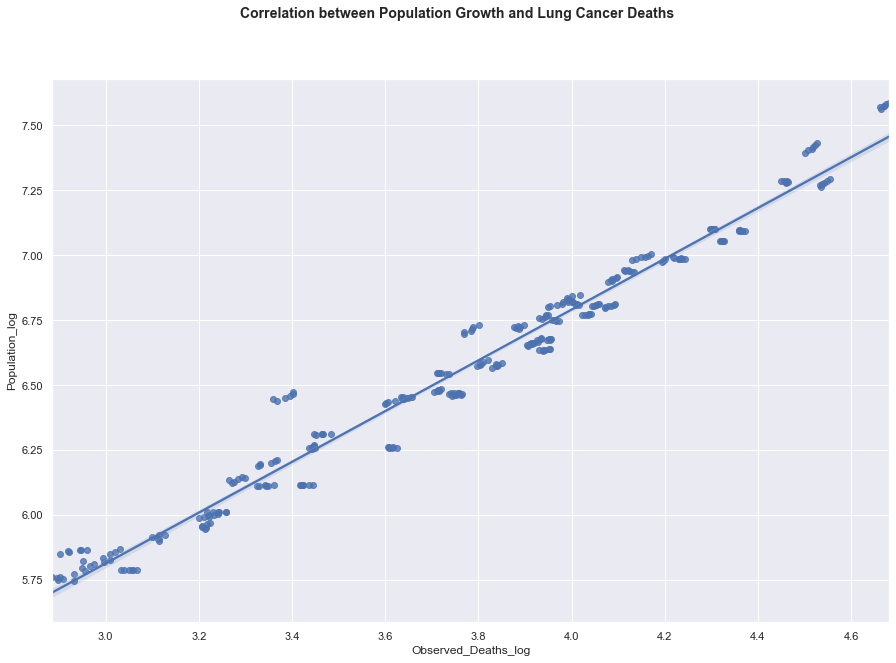

In [42]:
# Create Regression Plot
subtitle = "Correlation between Population Growth and Lung Cancer Deaths"
xval = "Observed_Deaths_log"
xlab = 'Number of Lung Cancer Deaths'
ylab = 'Population'
yval = 'Population_log'
sns_reg(subtitle, ser1, xlab, ylab, xval, yval)